# Author : Aman Singh

## The Sparks Foundation



## Task 4: Exploratory Data Analysis On Global Terrorism

### Aim: Read Data And Perform exploratry analysis to explore some insights about Golbal Terrorism.

## 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data= pd.read_csv(r"C:\Users\amans\Downloads\globalterrorismdb_0718dist.csv",encoding="latin1")
print("data Uploaded Sucessfully")
data.head(10)

C:\Users\amans\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


data Uploaded Sucessfully


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
data.shape

(181691, 135)

In [5]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
for i in data.columns:
    print(i,end="  ,  ")

eventid  ,  iyear  ,  imonth  ,  iday  ,  approxdate  ,  extended  ,  resolution  ,  country  ,  country_txt  ,  region  ,  region_txt  ,  provstate  ,  city  ,  latitude  ,  longitude  ,  specificity  ,  vicinity  ,  location  ,  summary  ,  crit1  ,  crit2  ,  crit3  ,  doubtterr  ,  alternative  ,  alternative_txt  ,  multiple  ,  success  ,  suicide  ,  attacktype1  ,  attacktype1_txt  ,  attacktype2  ,  attacktype2_txt  ,  attacktype3  ,  attacktype3_txt  ,  targtype1  ,  targtype1_txt  ,  targsubtype1  ,  targsubtype1_txt  ,  corp1  ,  target1  ,  natlty1  ,  natlty1_txt  ,  targtype2  ,  targtype2_txt  ,  targsubtype2  ,  targsubtype2_txt  ,  corp2  ,  target2  ,  natlty2  ,  natlty2_txt  ,  targtype3  ,  targtype3_txt  ,  targsubtype3  ,  targsubtype3_txt  ,  corp3  ,  target3  ,  natlty3  ,  natlty3_txt  ,  gname  ,  gsubname  ,  gname2  ,  gsubname2  ,  gname3  ,  gsubname3  ,  motive  ,  guncertain1  ,  guncertain2  ,  guncertain3  ,  individual  ,  nperps  ,  nperpcap  ,  c

In [7]:
#cleaning data
df= data[["iyear","imonth","iday","country_txt","provstate","city","latitude","longitude","location","summary",
           "attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes","region","region_txt"]]
df.head()

,iyear,imonth,iday,country_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes,region,region_txt
0,1970,7,2,Dominican Republic,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN,2,Central America & Caribbean
1,1970,0,0,Mexico,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,1,North America
2,1970,1,0,Philippines,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN,5,Southeast Asia
3,1970,1,0,Greece,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN,8,Western Europe
4,1970,1,0,Japan,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN,4,East Asia


In [8]:
df.tail()

,iyear,imonth,iday,country_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes,region,region_txt
181686,2017,12,31,Somalia,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,Armed Assault,Military,Al-Shabaab,NaN,Firearms,1.0,2.0,NaN,11,Sub-Saharan Africa
181687,2017,12,31,Syria,Lattakia,Jableh,35.407278,35.942679,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,Bombing/Explosion,Military,Muslim extremists,NaN,Explosives,2.0,7.0,NaN,10,Middle East & North Africa
181688,2017,12,31,Philippines,Maguindanao,Kubentog,6.900742,124.437908,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,NaN,5,Southeast Asia
181689,2017,12,31,India,Manipur,Imphal,24.798346,93.940430,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,Bombing/Explosion,Government (General),Unknown,NaN,Explosives,0.0,0.0,NaN,6,South Asia
181690,2017,12,31,Philippines,Maguindanao,Cotabato City,7.209594,124.241966,NaN,12/31/2017: An explosive device was discovered...,Bombing/Explosion,Unknown,Unknown,NaN,Explosives,0.0,0.0,NaN,5,Southeast Asia


In [9]:
df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
provstate             421
city                  434
latitude             4556
longitude            4557
location           126196
summary             66129
attacktype1_txt         0
targtype1_txt           0
gname                   0
motive             131130
weaptype1_txt           0
nkill               10313
nwound              16311
addnotes           153402
region                  0
region_txt              0
dtype: int64

In [10]:

# filling Null Values With 0
df["nkill"]=df["nkill"].fillna(0)
df["nwound"]=df["nwound"].fillna(0)
df["casuality"]=df["nkill"]+df["nwound"]

<ipython-input-10-945f6af5c2e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nkill"]=df["nkill"].fillna(0)
<ipython-input-10-945f6af5c2e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nwound"]=df["nwound"].fillna(0)
<ipython-input-10-945f6af5c2e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [11]:
df.describe()

,iyear,imonth,iday,latitude,longitude,nkill,nwound,region,casuality
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,7.160938,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,2.933408,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,1.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,5.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,6.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,10.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,12.000000,9574.000000


Observation
The data consist of terrorist activites ranging from the year 1970 t 2017
Maximum number of people killed in an event were:1570
Maximum number of people wounded in an event were: 8191
Maximum number of total casualities in an event were :9574
Visualization the insights
1. Year Wise

In [12]:

#1>year wise          
attacks=df["iyear"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","iyear":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


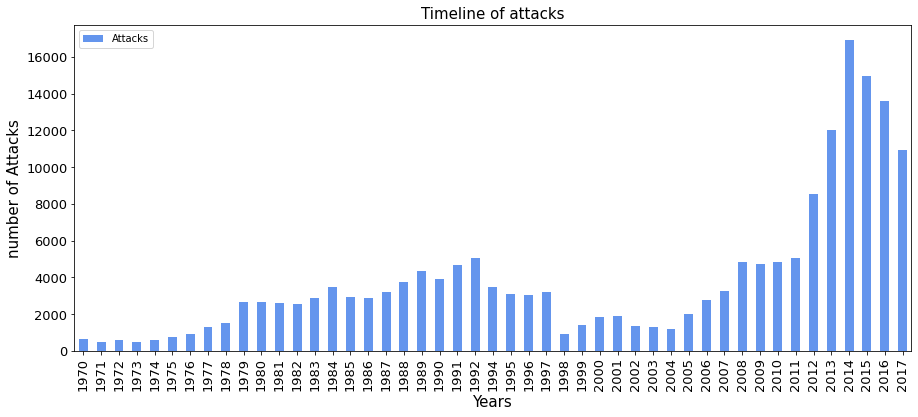

In [13]:
attacks.plot(kind= "bar",color="cornflowerblue", figsize=(15,6), fontsize=13)
plt.title("Timeline of attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("number of Attacks",fontsize=15)
plt.show()

In [14]:
#Number of casualites per Year
yc=df[["iyear","casuality"]].groupby("iyear").sum()
yc.head()

,casuality
iyear,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


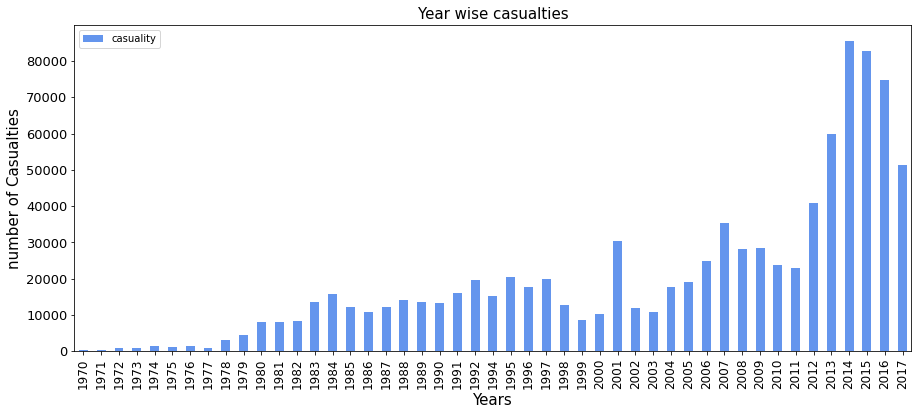

In [15]:
yc.plot(kind= "bar",color="cornflowerblue", figsize=(15,6), fontsize=13)
plt.title("Year wise casualties",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("number of Casualties",fontsize=15)
plt.show()

In [16]:
yk=df[["iyear","nkill"]].groupby("iyear").sum()
yk.head()

,nkill
iyear,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [17]:
yw=df[["iyear","nwound"]].groupby("iyear").sum()
yw.head()

,nwound
iyear,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


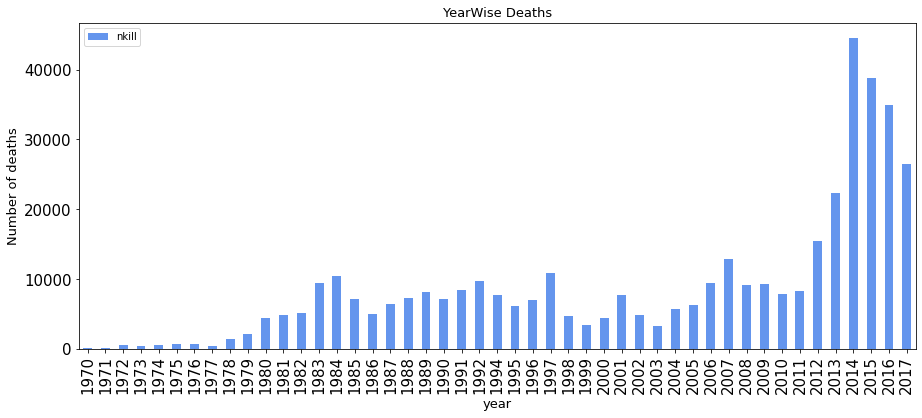

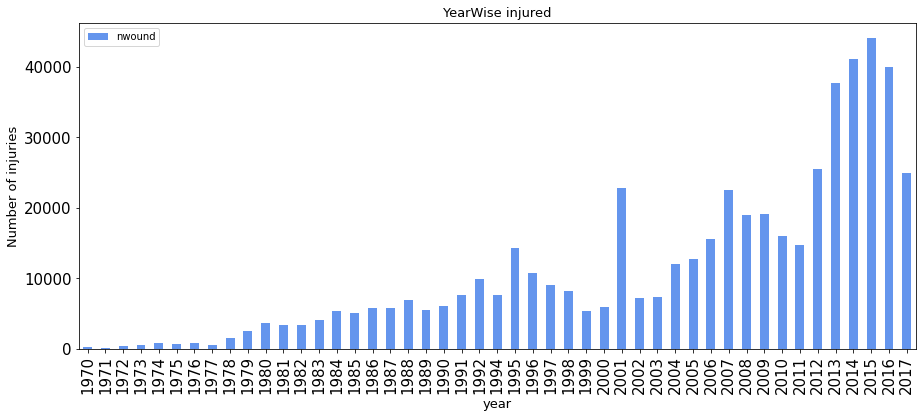

In [18]:
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=15)
plt.title("YearWise Deaths",fontsize=13)
plt.xlabel("year",fontsize=13)
plt.ylabel("Number of deaths",fontsize=13)
plt.show()
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=15)
plt.title("YearWise injured",fontsize=13)
plt.xlabel("year",fontsize=13)
plt.ylabel("Number of injuries",fontsize=13)
plt.show()

Region wise Attack

Distribution of attacks into Regions

In [19]:
reg=pd.crosstab(data.iyear,data.region_txt)
reg.head()

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
iyear,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


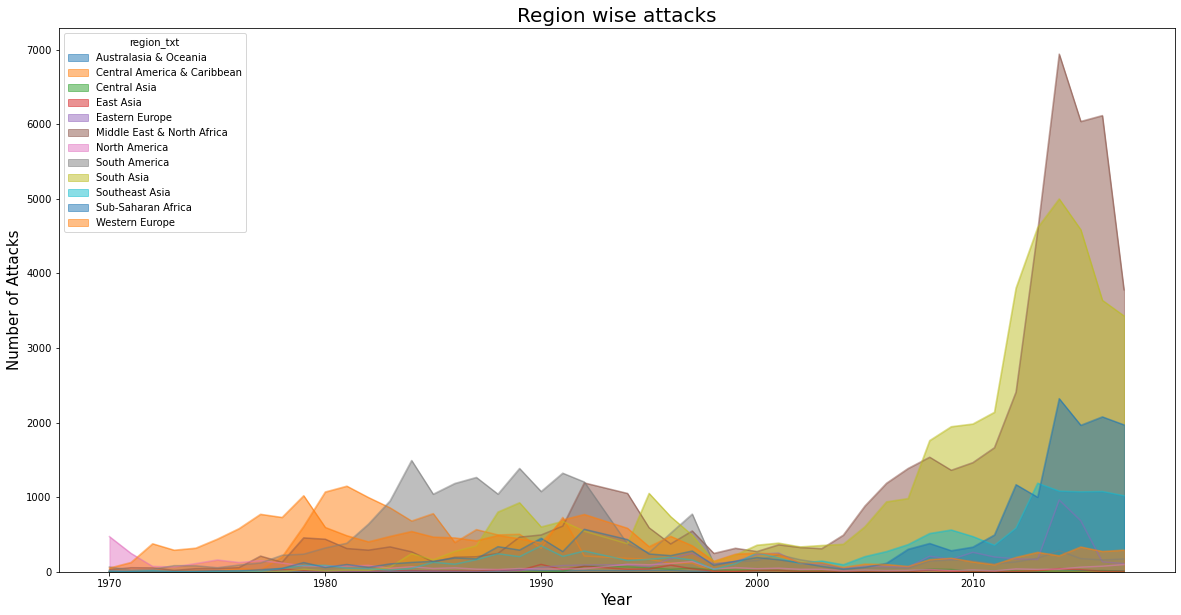

In [20]:

reg.plot(kind="area",stacked=False,alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

Attacks in each Region

In [21]:
regt=reg.transpose()
regt["total"]=regt.sum(axis=1)
ra=regt["total"].sort_values(ascending=False)
ra

region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: total, dtype: int64

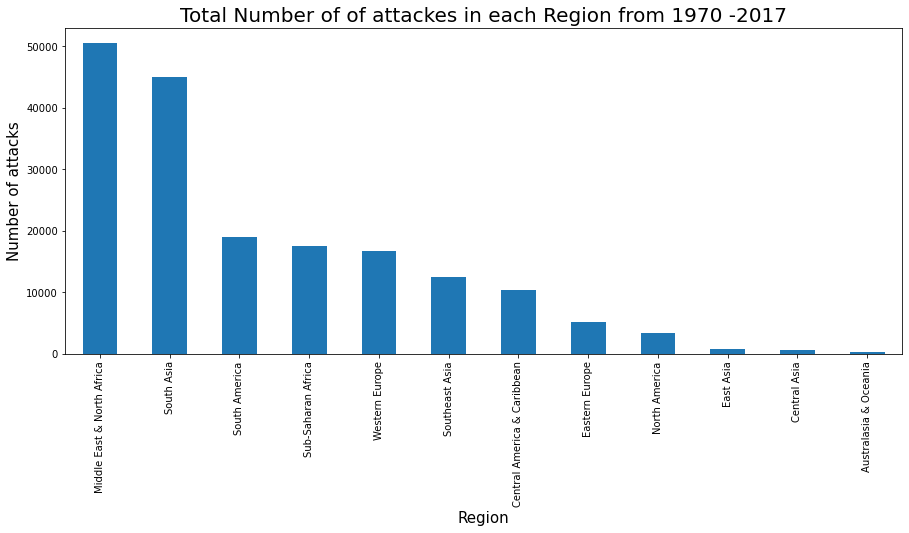

In [22]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of of attackes in each Region from 1970 -2017",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.show()

# Casualty ,deaths wound in Each Region

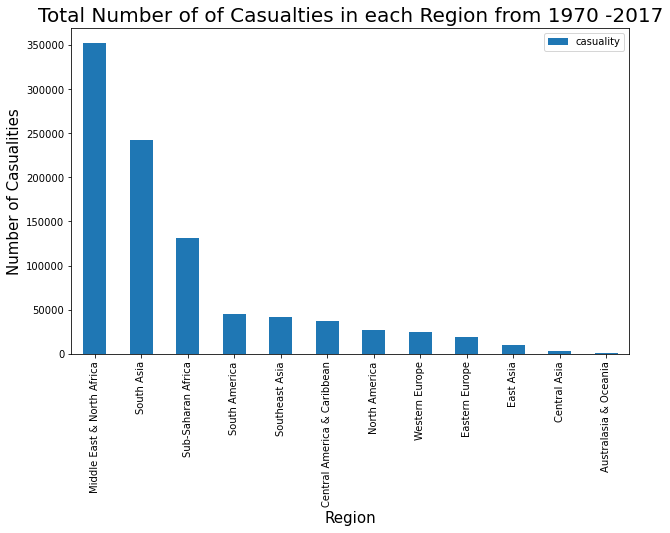

In [23]:

Rc=df[["region_txt","casuality"]].groupby("region_txt").sum().sort_values(by="casuality",ascending=False)

Rc.plot(kind="bar",figsize=(10,6))
plt.title("Total Number of of Casualties in each Region from 1970 -2017",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of Casualities",fontsize=15)
plt.show()

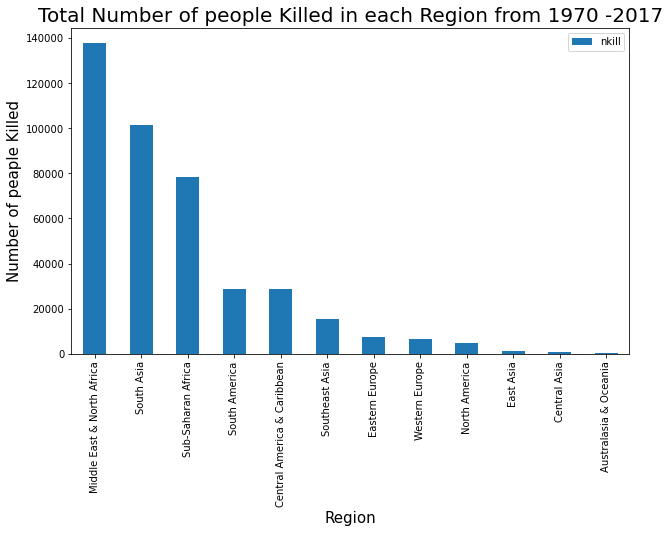

In [24]:
Rd=df[["region_txt","nkill"]].groupby("region_txt").sum().sort_values(by="nkill",ascending=False)

Rd.plot(kind="bar",figsize=(10,6))
plt.title("Total Number of people Killed in each Region from 1970 -2017",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of peaple Killed",fontsize=15)
plt.show()

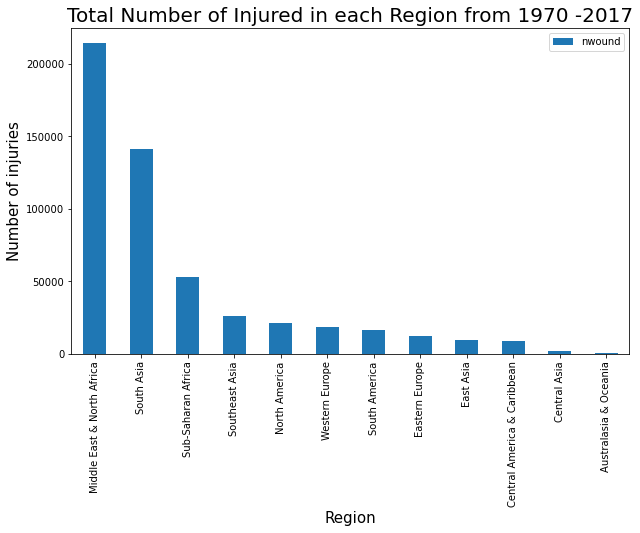

In [25]:
Rw=df[["region_txt","nwound"]].groupby("region_txt").sum().sort_values(by="nwound",ascending=False)

Rw.plot(kind="bar",figsize=(10,6))
plt.title("Total Number of Injured in each Region from 1970 -2017",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of injuries",fontsize=15)
plt.show()

Country wise Attacks

Top Countries most effected by Terrorism

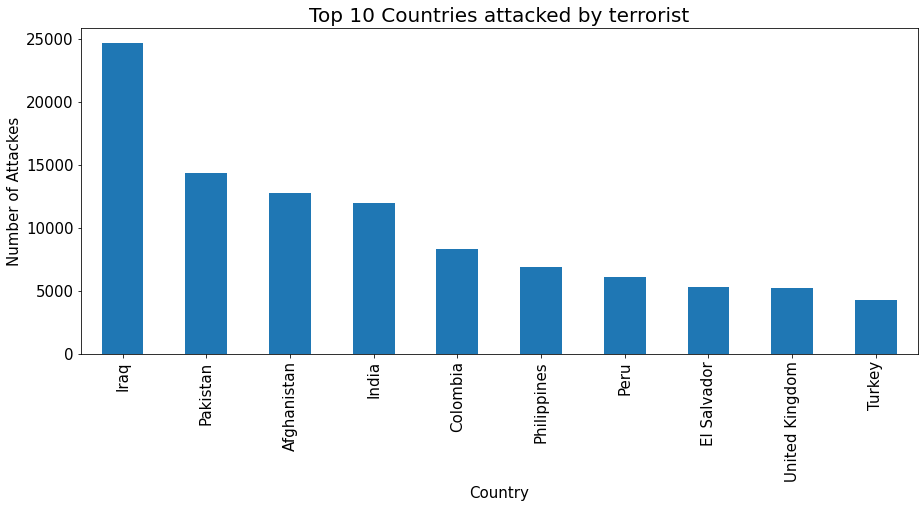

In [26]:
#finding numerical values
ct=df["country_txt"].value_counts().head(10)
#Graph
ct.plot(kind="bar",figsize=(15,6),fontsize=15)
plt.title("Top 10 Countries attacked by terrorist",fontsize=20)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Number of Attackes",fontsize=15)
plt.show()

Top 10 Countries Faced Most Casualities , deaths and Wounded.

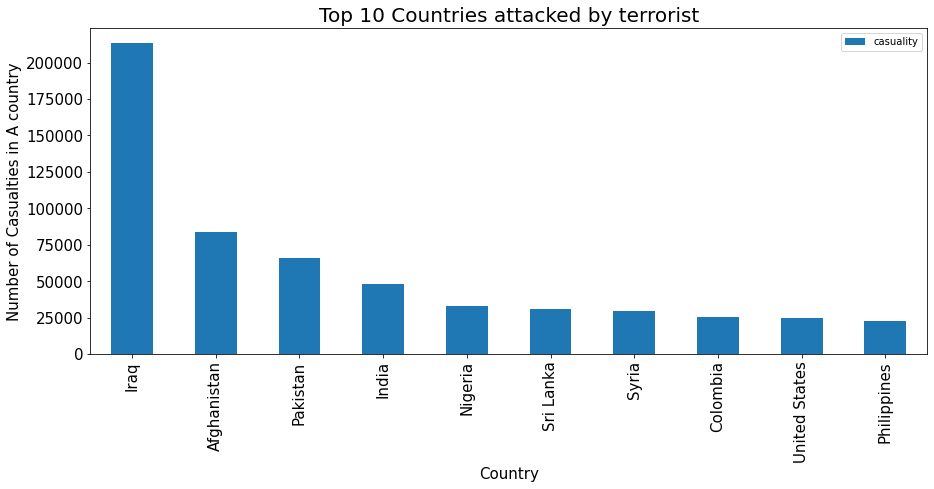

In [27]:
# TOTAL CASUALITIES OVER COUNTIRES
cc=df[["country_txt","casuality"]].groupby("country_txt").sum().sort_values(by="casuality",ascending=False).head(10)
#graph
cc.plot(kind="bar",figsize=(15,6),fontsize=15)
plt.title("Top 10 Countries attacked by terrorist",fontsize=20)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Number of Casualties in A country",fontsize=15)
plt.show()

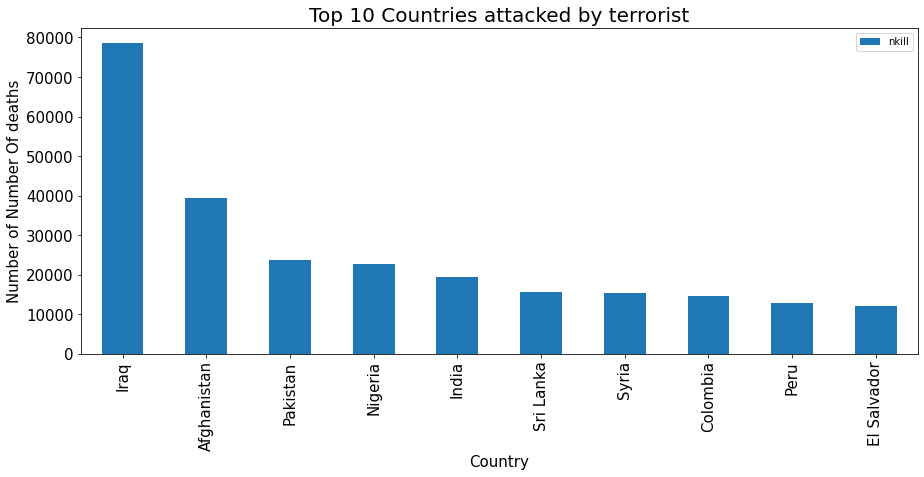

In [28]:
#TOTAL DEATHS OVER COUNTIRES
cd=df[["country_txt","nkill"]].groupby("country_txt").sum().sort_values(by="nkill",ascending=False).head(10)

cd.plot(kind="bar",figsize=(15,6),fontsize=15)
plt.title("Top 10 Countries attacked by terrorist",fontsize=20)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Number of Number Of deaths",fontsize=15)
plt.show()

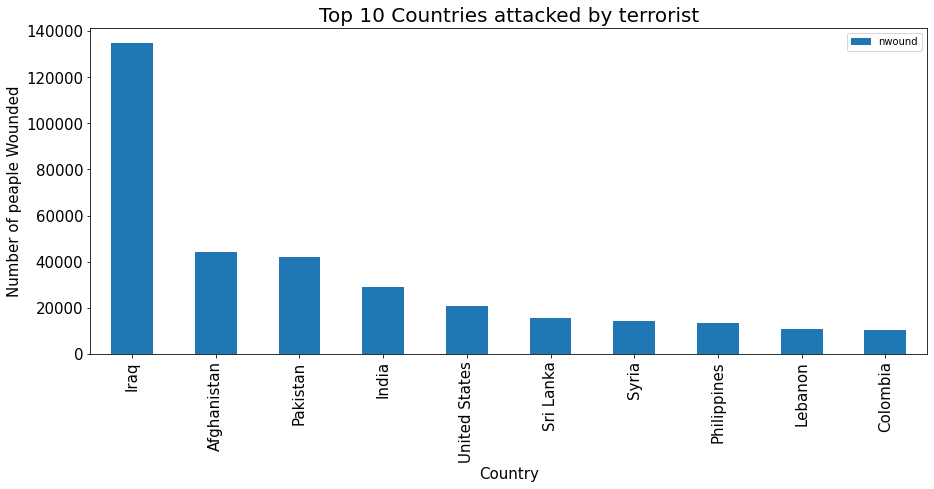

In [29]:
#TOTAL WOUNDED OVER COUNTIRES
cw=df[["country_txt","nwound"]].groupby("country_txt").sum().sort_values(by="nwound",ascending=False).head(10)


cw.plot(kind="bar",figsize=(15,6),fontsize=15)
plt.title("Top 10 Countries attacked by terrorist",fontsize=20)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Number of peaple Wounded",fontsize=15)
plt.show()

City wise ATTACKS

FINDING TOP 10 CITIES HAVING MOST ATTACKS

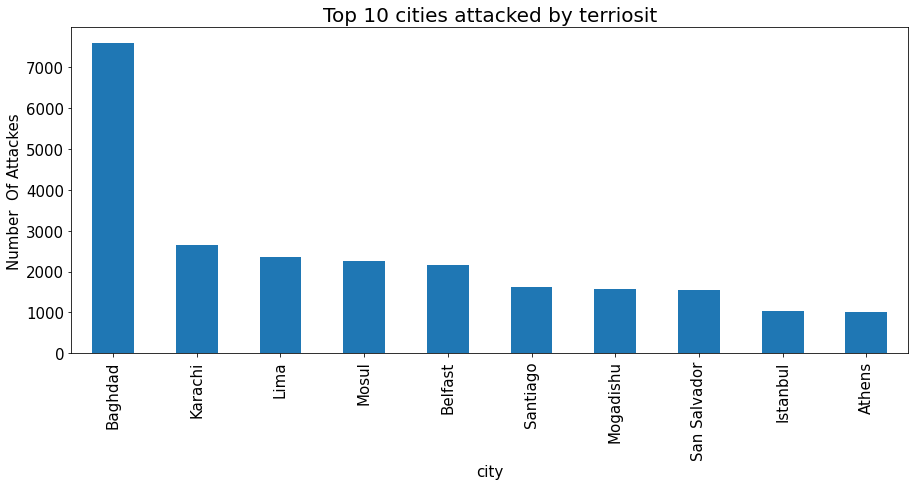

In [30]:
# TOP 10 CITIES HAD MOST TERRORIST ATTACKS
city=df["city"].value_counts()[1:11]
city

city.plot(kind="bar",figsize=(15,6),fontsize=15)
plt.title("Top 10 cities attacked by terriosit",fontsize=20)
plt.xlabel("city",fontsize=15)
plt.ylabel("Number  Of Attackes",fontsize=15)
plt.show()

MOST CASUALITIES ,DEATHS, AND WOUNDED PEOPLE IN TOP 10 CITIES.

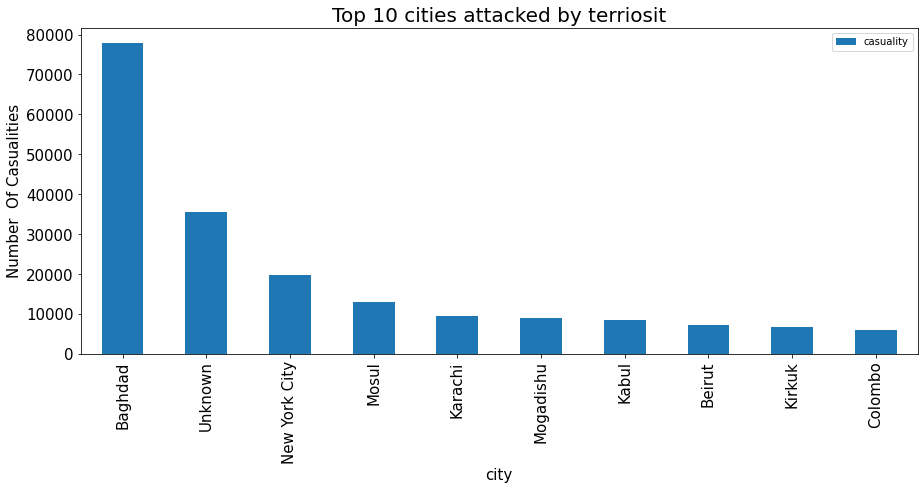

In [31]:
# Casualities 
cityCas=df[["city","casuality"]].groupby("city").sum().sort_values(by="casuality",ascending=False).head(10)

cityCas.plot(kind="bar",figsize=(15,6),fontsize=15)
plt.title("Top 10 cities attacked by terriosit",fontsize=20)
plt.xlabel("city",fontsize=15)
plt.ylabel("Number  Of Casualities",fontsize=15)
plt.show()

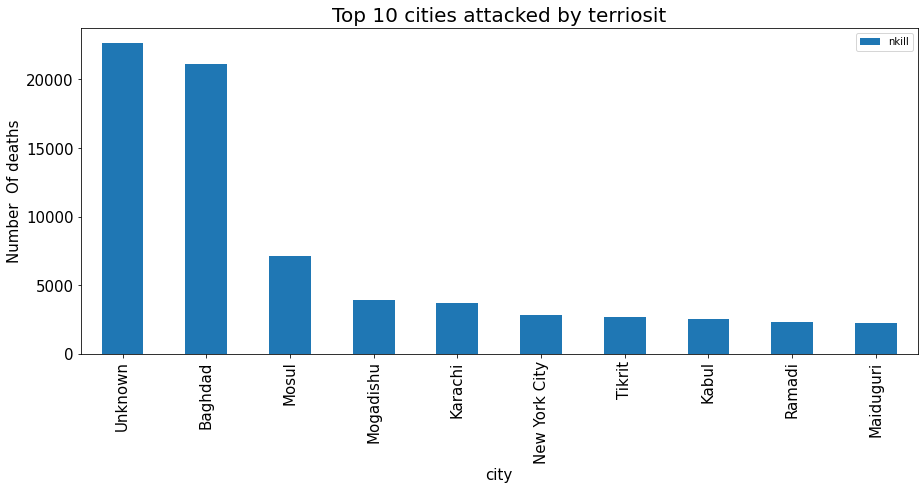

In [32]:
#deaths city wise
citykill=df[["city","nkill"]].groupby("city").sum().sort_values(by="nkill",ascending=False).head(10)

citykill.plot(kind="bar",figsize=(15,6),fontsize=15)
plt.title("Top 10 cities attacked by terriosit",fontsize=20)
plt.xlabel("city",fontsize=15)
plt.ylabel("Number  Of deaths",fontsize=15)
plt.show()

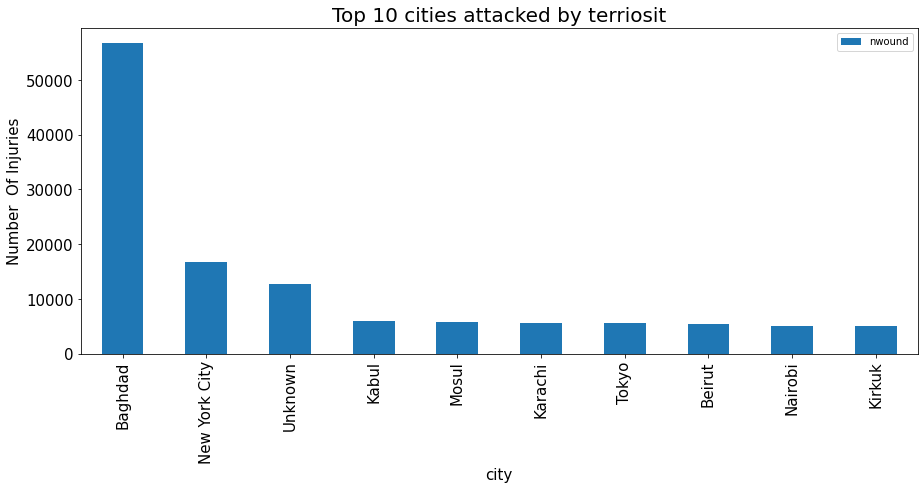

In [33]:
# Wounded city wise
citywound=df[["city","nwound"]].groupby("city").sum().sort_values(by="nwound",ascending=False).head(10)

citywound.plot(kind="bar",figsize=(15,6),fontsize=15)
plt.title("Top 10 cities attacked by terriosit",fontsize=20)
plt.xlabel("city",fontsize=15)
plt.ylabel("Number  Of Injuries",fontsize=15)
plt.show()


#  10 Most Active Terrorist groups

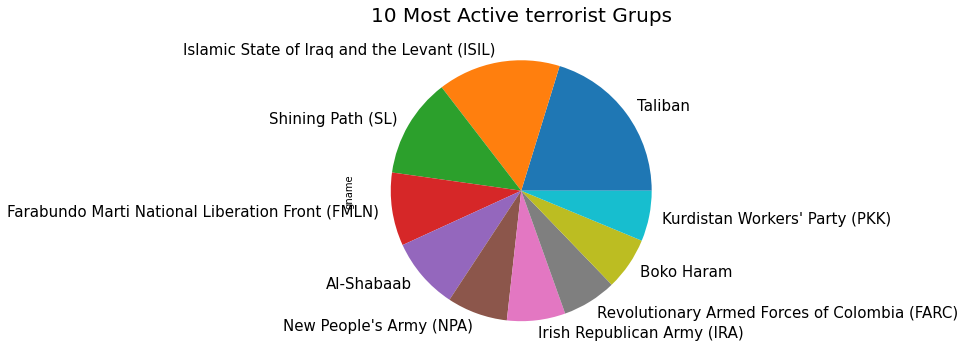

In [34]:
grp=df["gname"].value_counts()[1:11]
grp

grp.plot(kind="pie",figsize=(15,6),fontsize=15)
plt.title("10 Most Active terrorist Grups",fontsize=20)

plt.show()

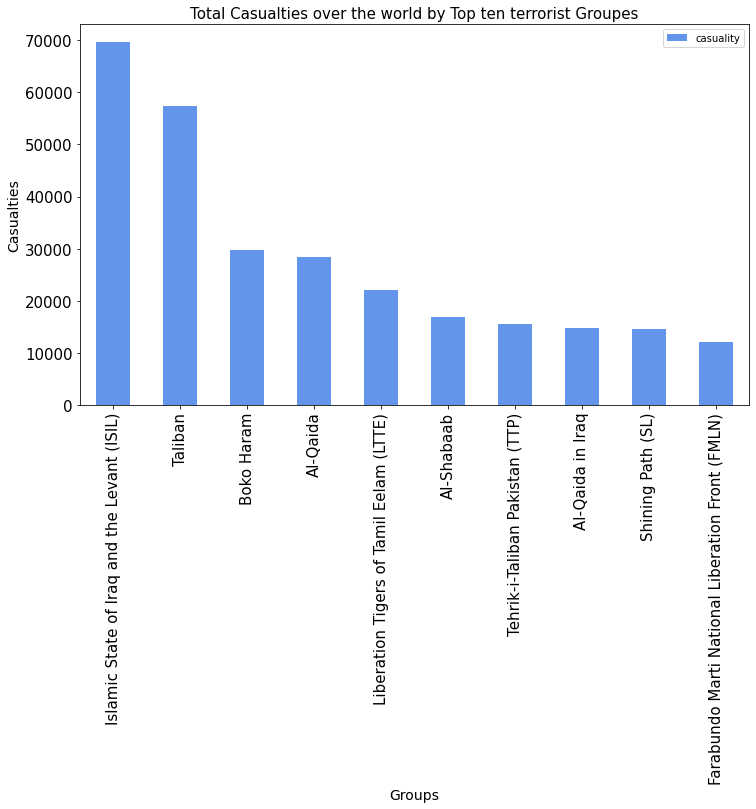

In [35]:
# Casualities
grpcas=df[["gname","casuality"]].groupby("gname").sum().sort_values(by="casuality",ascending=False).drop("Unknown").head(10)
grpcas.plot(kind="bar",color="cornflowerblue",figsize=(12,7),fontsize=15)
plt.title("Total Casualties over the world by Top ten terrorist Groupes",fontsize=15)
plt.xlabel("Groups",fontsize=14)
plt.ylabel("Casualties",fontsize=14)
plt.show()

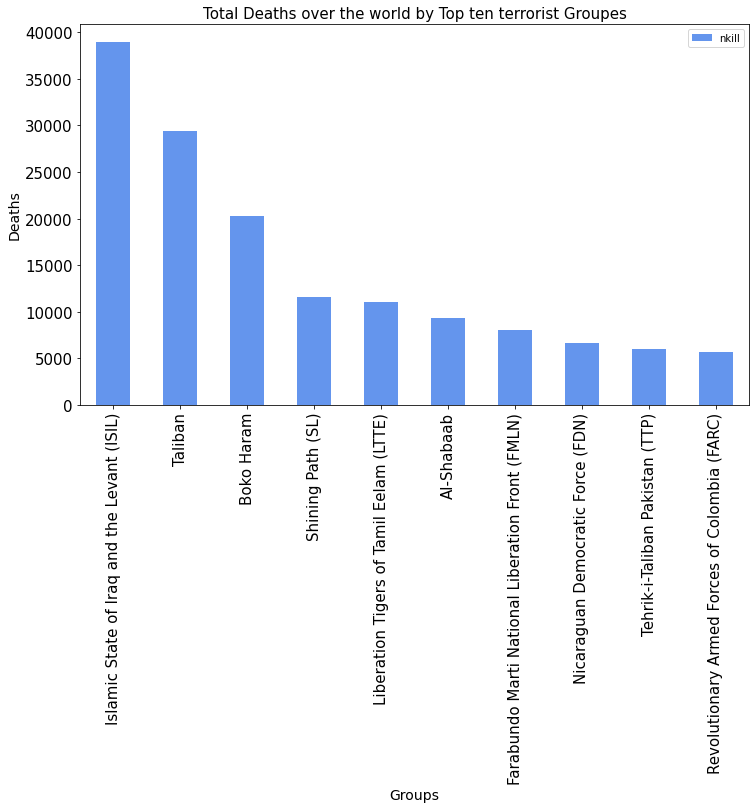

In [36]:
#Deaths
grpdeath=df[["gname","nkill"]].groupby("gname").sum().sort_values(by="nkill",ascending=False).drop("Unknown").head(10)
grpdeath.plot(kind="bar",color="cornflowerblue",figsize=(12,7),fontsize=15)
plt.title("Total Deaths over the world by Top ten terrorist Groupes",fontsize=15)
plt.xlabel("Groups",fontsize=14)
plt.ylabel("Deaths",fontsize=14)
plt.show()

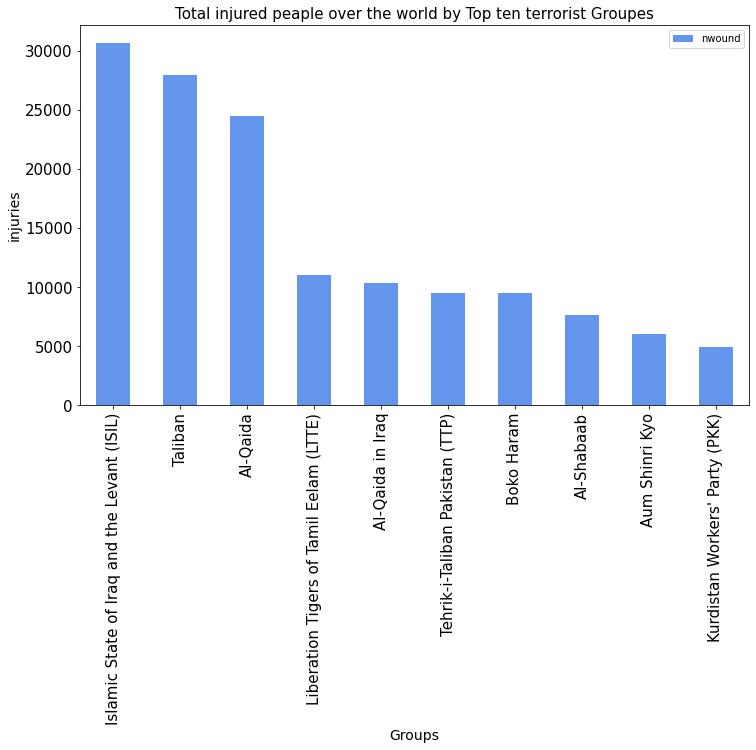

In [37]:
#wounded
grpwound=df[["gname","nwound"]].groupby("gname").sum().sort_values(by="nwound",ascending=False).drop("Unknown").head(10)
grpwound.plot(kind="bar",color="cornflowerblue",figsize=(12,7),fontsize=15)
plt.title("Total injured peaple over the world by Top ten terrorist Groupes",fontsize=15)
plt.xlabel("Groups",fontsize=14)
plt.ylabel("injuries",fontsize=14)
plt.show()

Attacktypes

Diffrent types of attacks like 1>. Bomb Explosion 2>. Armed Assault.

Here we finding which type of attack is occers mostly.

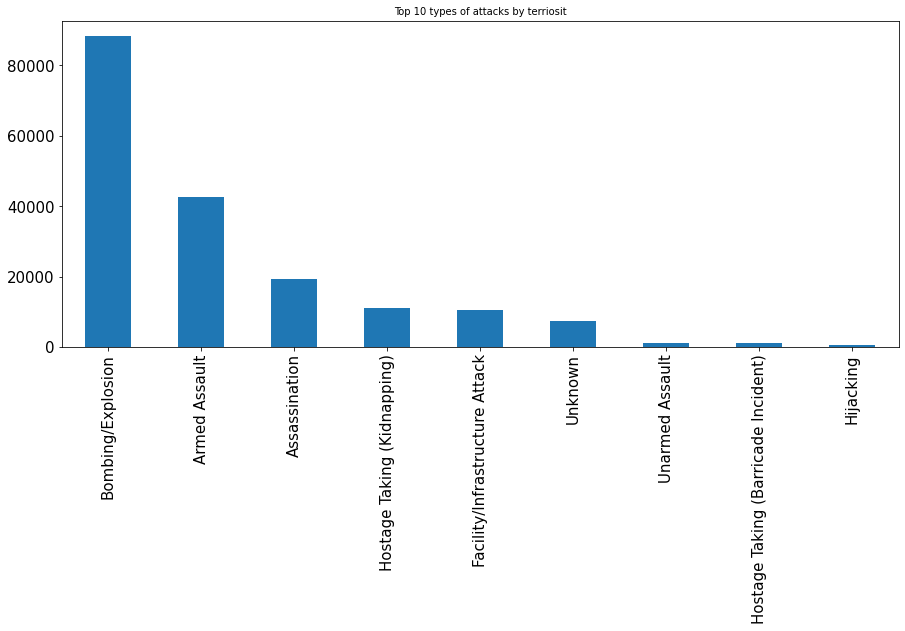

In [38]:
#diff type of attacks
at=df["attacktype1_txt"].value_counts()
at.plot(kind="bar",figsize=(15,6),fontsize=15)
plt.title("Top 10 types of attacks by terriosit",fontsize=10)

plt.show()

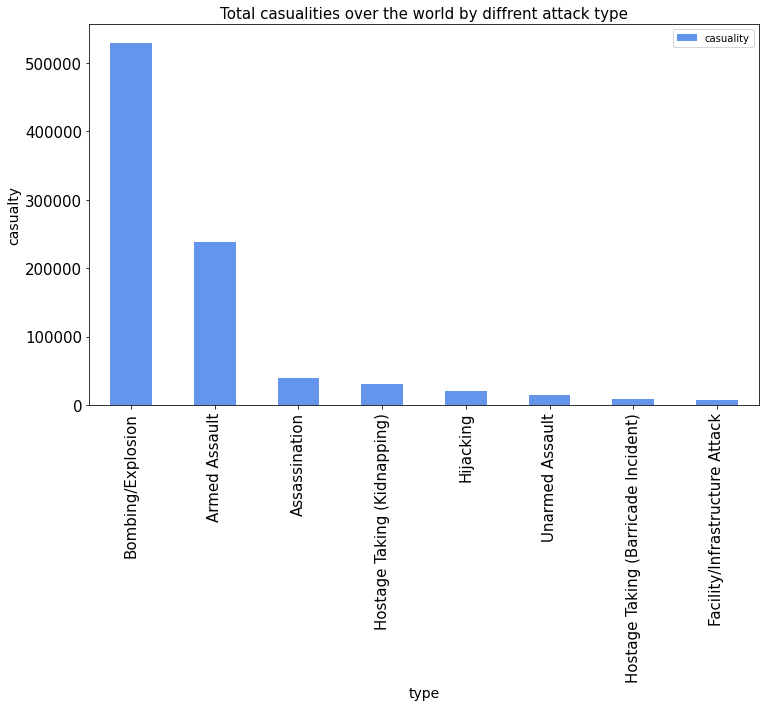

In [39]:
# Casualities
atcas=df[["attacktype1_txt","casuality"]].groupby("attacktype1_txt").sum().sort_values(by="casuality",ascending=False).drop("Unknown").head(10)
atcas.plot(kind="bar",color="cornflowerblue",figsize=(12,7),fontsize=15)
plt.title("Total casualities over the world by diffrent attack type",fontsize=15)
plt.xlabel("type",fontsize=14)
plt.ylabel("casualty",fontsize=14)
plt.show()

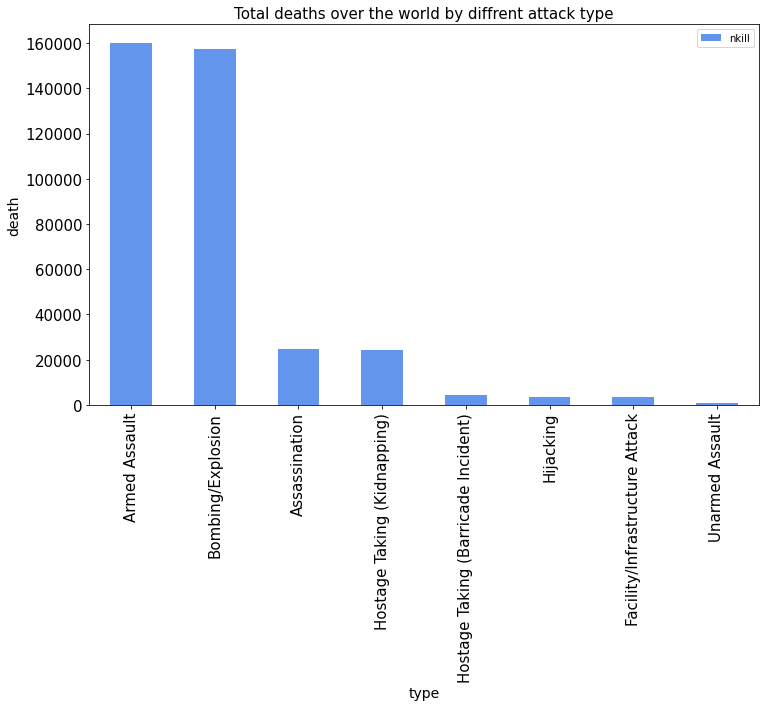

In [40]:
#deaths
atdeath=df[["attacktype1_txt","nkill"]].groupby("attacktype1_txt").sum().sort_values(by="nkill",ascending=False).drop("Unknown").head(10)
atdeath.plot(kind="bar",color="cornflowerblue",figsize=(12,7),fontsize=15)
plt.title("Total deaths over the world by diffrent attack type",fontsize=15)
plt.xlabel("type",fontsize=14)
plt.ylabel("death",fontsize=14)
plt.show()

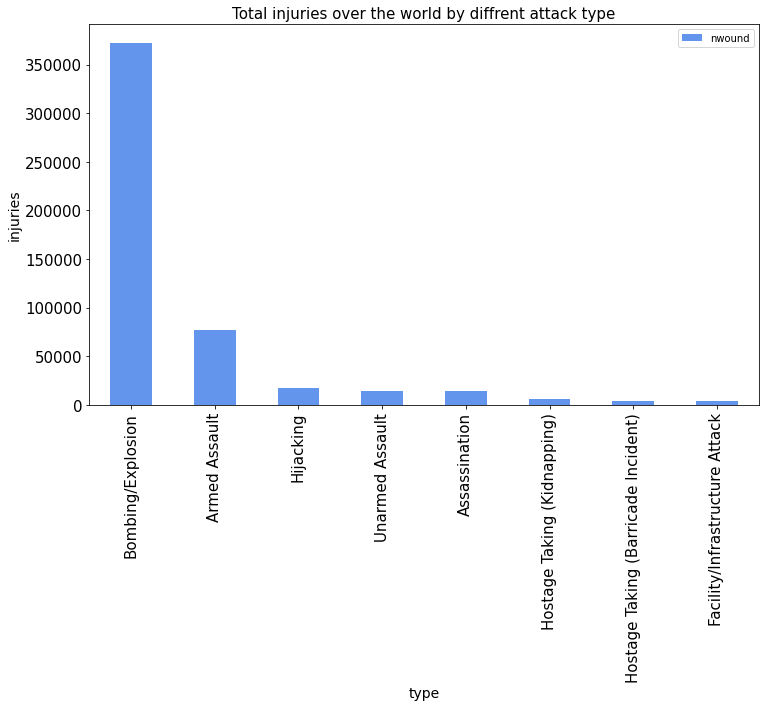

In [41]:
#Wounded
atwound=df[["attacktype1_txt","nwound"]].groupby("attacktype1_txt").sum().sort_values(by="nwound",ascending=False).drop("Unknown").head(10)
atwound.plot(kind="bar",color="cornflowerblue",figsize=(12,7),fontsize=15)
plt.title("Total injuries over the world by diffrent attack type",fontsize=15)
plt.xlabel("type",fontsize=14)
plt.ylabel("injuries",fontsize=14)
plt.show()

# Gruop+Country

# Which Group Most Active In Which Country.

C:\Users\amans\Anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


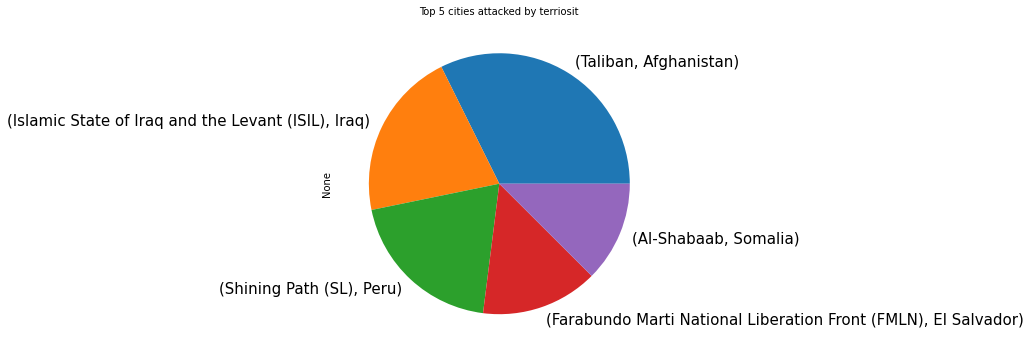

In [42]:
gca=df[["gname","country_txt"]].value_counts().drop("Unknown")
g=gca.head(5)
g.plot(kind="pie",figsize=(15,6),fontsize=15)
plt.title("Top 5 cities attacked by terriosit",fontsize=10)

plt.show()

humanity affected world wide

In [43]:
#Casualities over world wide
casualty=df.loc[:,"casuality"].sum()
print("total loss of Humanity over the world is : ",casualty)

total loss of Humanity over the world is :  935737.0


In [44]:
#Deaths over world wide
death=df.loc[:,"nkill"].sum()
print("total loss of Humans over the world is : ",death)

total loss of Humans over the world is :  411868.0


In [45]:
#wounded over world wide
wound=df.loc[:,"nwound"].sum()
print("total loss of Humanity over the world is : ",wound)

total loss of Humanity over the world is :  523869.0


##Outcomes:
    
1) Maximum number of attacks were occurs in the year of 2014 and Least in the year of 1971.
2) Maximum number of Casualities were happend in the year of 2014 and Least in the year of 1971.
3) Most Affected Region is Middle East & North Africa and Least Affected is Asutrelia.
4) Most Affected Country is Iraq and least is Trukey.
5) Most Casualities happend in the Iraq and Least in Philippiens.
6) Most Affected city is Bagdad and least is athens.
7) Most Active terrorist group is Taliban.
8) Most Attack type which is used is Bombing and Explosion.

## Here this task completed.

## Thank you